In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline
sns.set()

In [17]:
data = pd.read_csv("C:/Users/vineet/Desktop/wineQualityReds.csv")

In [18]:
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
Unnamed: 0              1599 non-null int64
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [20]:
data.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
data = data.iloc[:,1:]
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
data.corr()['quality']

fixed.acidity           0.124052
volatile.acidity       -0.390558
citric.acid             0.226373
residual.sugar          0.013732
chlorides              -0.128907
free.sulfur.dioxide    -0.050656
total.sulfur.dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [21]:
#in this we are trying to find the correlation of all features with the quality of wine

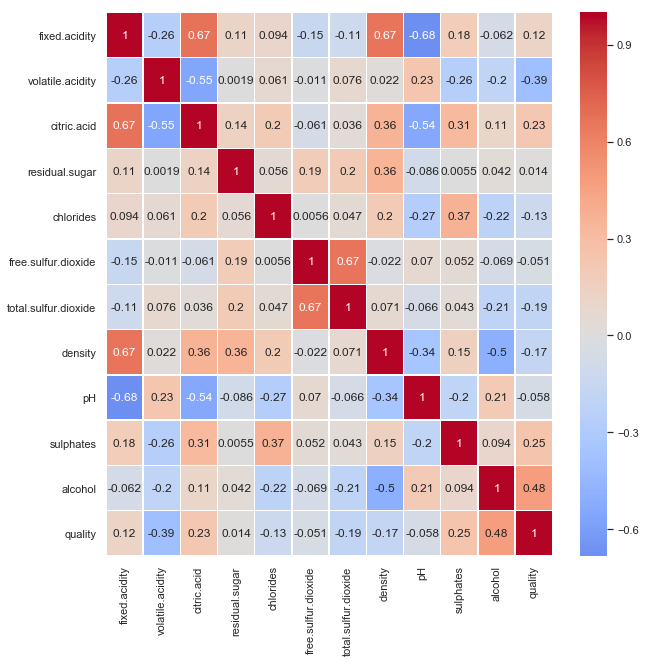

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

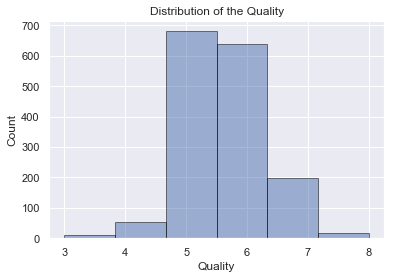

In [25]:
plt.hist(data.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [12]:
# the average quality of wine range from 5 to 7

In [26]:
from collections import Counter
Counter(data['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

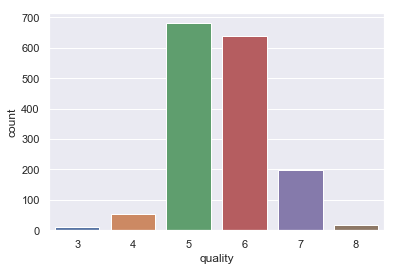

In [28]:
sns.countplot(x='quality', data=data)

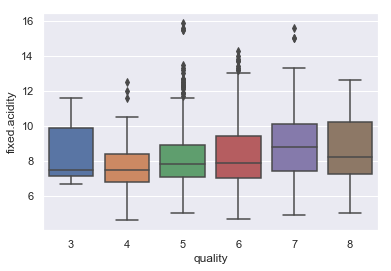

In [30]:
sns.boxplot('quality', 'fixed.acidity', data = data)

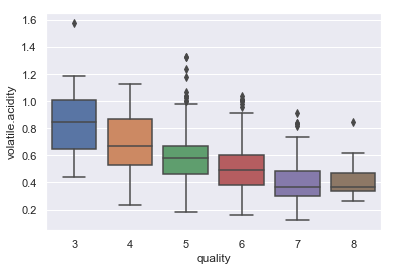

In [31]:
sns.boxplot('quality', 'volatile.acidity', data = data)

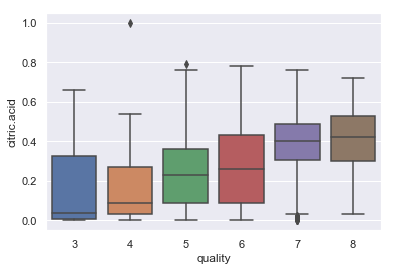

In [32]:
sns.boxplot('quality', 'citric.acid', data = data)

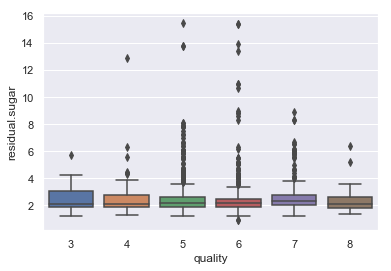

In [33]:
sns.boxplot('quality', 'residual.sugar', data = data)

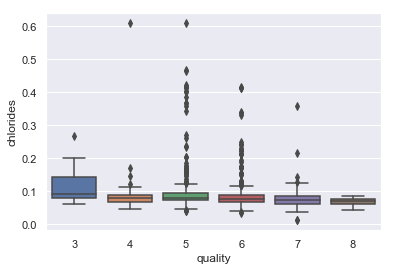

In [34]:
sns.boxplot('quality', 'chlorides', data = data)

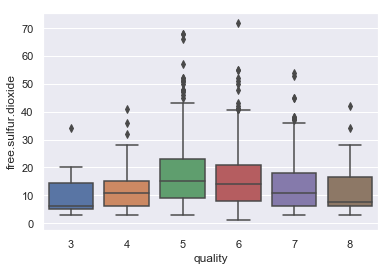

In [35]:
sns.boxplot('quality', 'free.sulfur.dioxide', data = data)

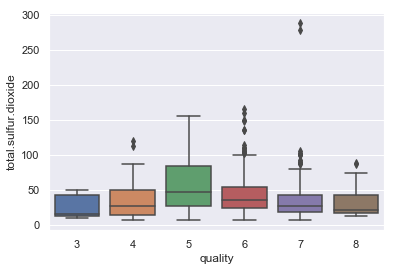

In [36]:
sns.boxplot('quality', 'total.sulfur.dioxide', data = data)

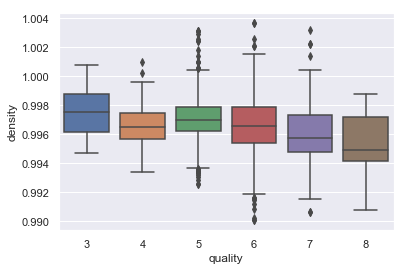

In [37]:
sns.boxplot('quality', 'density', data = data)

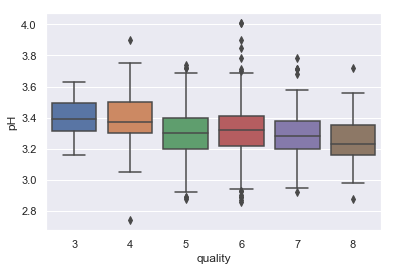

In [38]:
sns.boxplot('quality', 'pH', data = data)

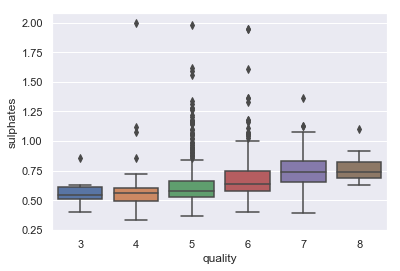

In [39]:
sns.boxplot('quality', 'sulphates', data = data)

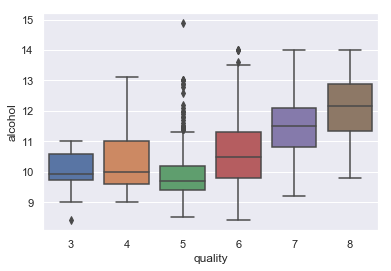

In [40]:
sns.boxplot('quality', 'alcohol', data = data)

In [41]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [42]:
label_quality = LabelEncoder()

In [44]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [45]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

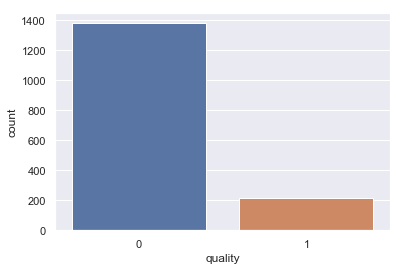

In [46]:
sns.countplot(data['quality'])

In [47]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
sc = StandardScaler()

In [50]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [51]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [52]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       273
           1       0.80      0.43      0.56        47

   micro avg       0.90      0.90      0.90       320
   macro avg       0.85      0.70      0.75       320
weighted avg       0.89      0.90      0.89       320



In [53]:
print(confusion_matrix(y_test, pred_rfc))

[[268   5]
 [ 27  20]]


In [54]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [55]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [56]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9132320374015748